# Equilibrating the 17-alanine simulation

The aim of this notebook is to create an equilibrated 17-alanine simulation. 

We will do this in the following steps:
1. Load the current 17-alanine simulation from SubtleGame.
2. Run the simulation for 1.5 ns. This should ensure that the energies and temperature are stable.
3. Save the simulation with the serialized State to an XML file.

In [1]:
from nanover.omni.openmm import OpenMMSimulation
from nanover.openmm import serializer
from openmm import app
import os

## Step 1: Storing the file names

In [2]:
# 1 - input
input_xml_file = "17-ala_original.xml"

# 2 - equilibrated system
equilibrated_xml_file = "17-ala_equilibrated.xml"
equilibration_dcd_file = "17-ala_equilibration_trajectory.dcd"
equilibration_statedata_file = "17-ala_equilibration_trajectory.log"

## Step 2: Equilibration

In [3]:
# Create server
simulation = OpenMMSimulation.from_xml_path(input_xml_file)
simulation.load()

# Create reporters for recording the simulation
dcd_reporter = app.DCDReporter(equilibration_dcd_file, 1)
statedata_reporter = app.StateDataReporter(equilibration_statedata_file, 1, 
                                           temperature=True, step=True,
                                           time=True, potentialEnergy=True, kineticEnergy=True)

# Attach reporters
simulation.simulation.reporters.append(dcd_reporter)
simulation.simulation.reporters.append(statedata_reporter)

In [4]:
# Perform energy minimisation
simulation.simulation.minimizeEnergy()

In [5]:
# Set parameters
total_time_in_ps = 1500
time_step_interval = 0.002 # in ps
desired_interval_in_ps = 100

total_num_steps = total_time_in_ps/time_step_interval
print(f"Running for {total_num_steps} steps")

# Run the dynamics
cumulative_total_time_ps = 0

for n in range(int(total_time_in_ps/desired_interval_in_ps)):
    
    simulation.simulation.step(desired_interval_in_ps)
    cumulative_total_time_ps += desired_interval_in_ps
    print(f"{cumulative_total_time_ps} ps run.")

    # Save the simulation with the serialized State
    file_name =  f"17-ala_equilibration_run_{cumulative_total_time_ps}_ps.xml"
    with open(file_name, 'w') as outfile:
        outfile.write(serializer.serialize_simulation(simulation.simulation, save_state=True))

with open(equilibrated_xml_file, 'w') as outfile:
        outfile.write(serializer.serialize_simulation(simulation.simulation, save_state=True))

Running for 750000.0 steps
100 ps run.
200 ps run.
300 ps run.
400 ps run.
500 ps run.
600 ps run.
700 ps run.
800 ps run.
900 ps run.
1000 ps run.
1100 ps run.
1200 ps run.
1300 ps run.
1400 ps run.
1500 ps run.


In [6]:
# Close the reporters
dcd_reporter.__del__()
statedata_reporter.__del__()

### Analysis

Read the data saved by the StateDataReporter to plot the temperature and potential energy.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load the log file into a Pandas DataFrame
df = pd.read_csv(equilibration_statedata_file, sep=",")

# Format the column headings and print
sim_step_label = "Step #"
df = df.rename(columns={'#"Step"': sim_step_label})
#print(df)

In [9]:
pot_energy_label = "Potential Energy (kJ/mole)"
temp_label = "Temperature (K)"
sim_step_label = "Step #"
sim_step_axis_label = "Simulation step"

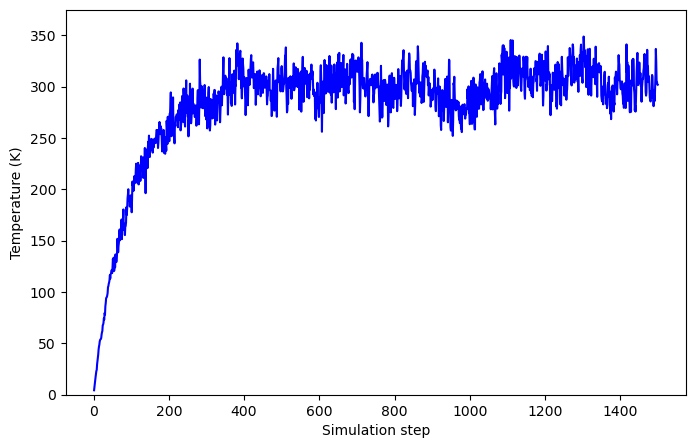

In [10]:
# Plot the temperature
plt.figure(figsize=(8, 5))
plt.plot(df[sim_step_label], df[temp_label], label="Temperature", color="blue")

# Labels and legend
plt.xlabel(sim_step_axis_label)
plt.ylabel(temp_label)
plt.ylim(0, 375)

# plt.show()
plt.savefig("temperature-against-time.png")

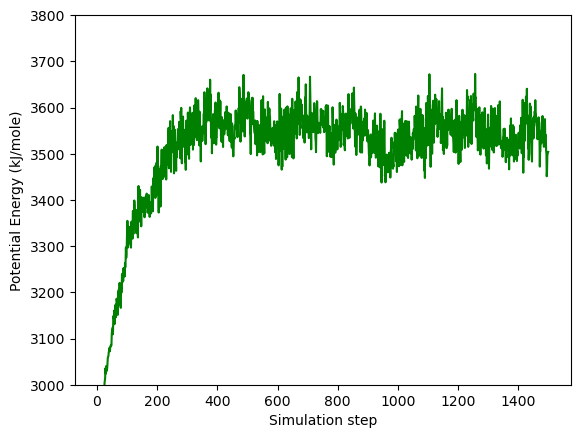

In [11]:
# Plot the potential energy
plt.plot(df[sim_step_label], df[pot_energy_label], label=pot_energy_label, color= 'green')
plt.xlabel(sim_step_axis_label)
plt.ylabel(pot_energy_label)
plt.ylim(3000, 3800)

# plt.show()
plt.savefig("potential-energy-against-time.png")

## Step 3: Final check

In [23]:
# Store file names
equilibrated_xml_file = "17-ala_equilibrated.xml"
final_check_dcd_path = "17-ala_equilibration_final_check.dcd"
final_check_statedata_path = "17-ala_equilibration_final_check.log"

In [24]:
# Create OpenMM simulation
simulation = OpenMMSimulation.from_xml_path(equilibrated_xml_file)
simulation.load()

# Create reporters for recording the simulation
dcd_reporter = app.DCDReporter(final_check_dcd_path, 1)
statedata_reporter = app.StateDataReporter(final_check_statedata_path, 1, 
                                           temperature=True, step=True,
                                           time=True, potentialEnergy=True, kineticEnergy=True)

# Attach reporters
simulation.simulation.reporters.append(dcd_reporter)
simulation.simulation.reporters.append(statedata_reporter)

In [25]:
# Set parameters
total_time_in_ps = 1500
time_step_interval = 0.002 # in ps
desired_interval_in_ps = 100

total_num_steps = total_time_in_ps/time_step_interval
print(f"Running for {total_num_steps} steps")

# Run the dynamics
cumulative_total_time_ps = 0

for n in range(int(total_time_in_ps/desired_interval_in_ps)):
    
    simulation.simulation.step(desired_interval_in_ps)
    cumulative_total_time_ps += desired_interval_in_ps
    print(f"{cumulative_total_time_ps} ps run.")

    # Save the simulation with the serialized State
    file_name =  f"17-ala_equilibration_final_check_{cumulative_total_time_ps}_ps.xml"
    with open(file_name, 'w') as outfile:
        outfile.write(serializer.serialize_simulation(simulation.simulation, save_state=True))


Running for 750000.0 steps
100 ps run.
200 ps run.
300 ps run.
400 ps run.
500 ps run.
600 ps run.
700 ps run.
800 ps run.
900 ps run.
1000 ps run.
1100 ps run.
1200 ps run.
1300 ps run.
1400 ps run.
1500 ps run.


In [26]:
# Close the reporters
dcd_reporter.__del__()
statedata_reporter.__del__()

### Plotting

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load the log file into a Pandas DataFrame
df = pd.read_csv(final_check_statedata_path, sep=",")

# Format the column headings and print
sim_step_label = "Step #"
df = df.rename(columns={'#"Step"': sim_step_label})

# Setup labels
pot_energy_label = "Potential Energy (kJ/mole)"
temp_label = "Temperature (K)"
sim_step_label = "Step #"
sim_step_axis_label = "Simulation step"

pot_energy_label = "Potential Energy (kJ/mole)"
temp_label = "Temperature (K)"
sim_step_label = "Step #"
sim_step_axis_label = "Simulation step"

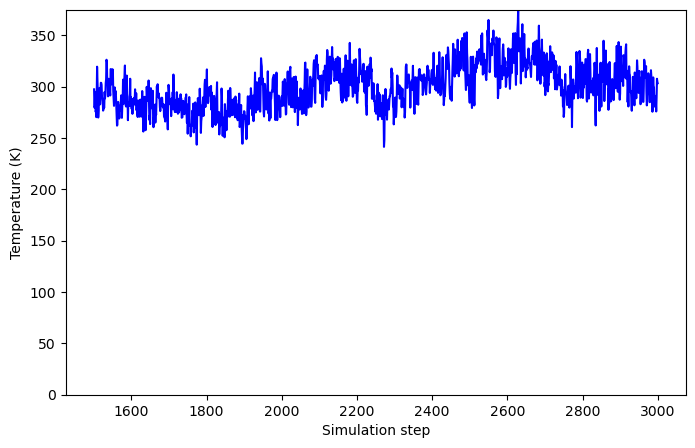

In [32]:
# Plot the temperature
plt.figure(figsize=(8, 5))
plt.plot(df[sim_step_label], df[temp_label], label="Temperature", color="blue")

# Labels and legend
plt.xlabel(sim_step_axis_label)
plt.ylabel(temp_label)
plt.ylim(0, 375)

# plt.show()
plt.savefig("final-check_temperature-against-time.png")

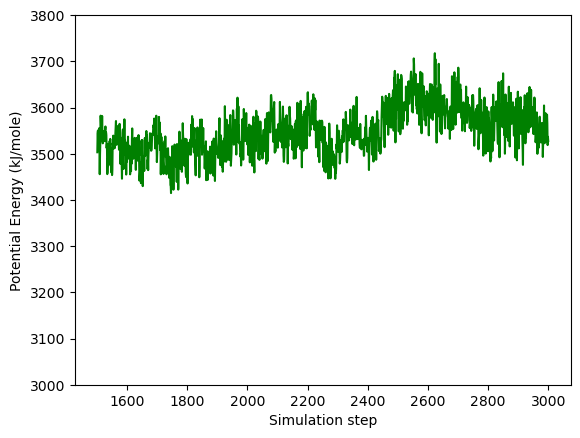

In [31]:
# Plot the potential energy
plt.plot(df[sim_step_label], df[pot_energy_label], label=pot_energy_label, color= 'green')
plt.xlabel(sim_step_axis_label)
plt.ylabel(pot_energy_label)
plt.ylim(3000, 3800)

# plt.show()
plt.savefig("final-check_potential-energy-against-time.png")